# Playwright VNC Test Notebook

This notebook demonstrates that the Playwright VNC container is working correctly.
You should be able to see the browser actions through the VNC viewer at:
- noVNC Web Interface: http://localhost:6080
- Direct VNC: localhost:5900

## 1. Basic Environment Check

In [1]:
# Check Python version and Playwright installation
import sys
import subprocess

print(f"Python version: {sys.version}")

# Check Playwright installation
try:
    import playwright
    # Get Playwright version using pip instead of the module attribute
    result = subprocess.run(["pip", "show", "playwright"], capture_output=True, text=True)
    version_line = [line for line in result.stdout.split('\n') if line.startswith('Version:')]
    version = version_line[0].split(': ')[1] if version_line else 'unknown'
    print(f"Playwright version: {version}")
    print("✅ Playwright is installed correctly")
except ImportError:
    print("❌ Playwright not found")

Python version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
Playwright version: 1.51.0
✅ Playwright is installed correctly


## 2. Display Test

This will test if the display environment is properly configured.

In [2]:
# Check display settings for VNC
!echo $DISPLAY
# Install xdpyinfo if it's not found
!apt-get update -qq && apt-get install -y -qq x11-utils > /dev/null 2>&1 || echo "Could not install x11-utils"
!xdpyinfo | grep -i "dimensions" || echo "Could not get display dimensions"

:1
  dimensions:    1920x1080 pixels (488x274 millimeters)


## 3. Run Playwright with VNC (Async Version)

This test will launch a browser that should be visible in the VNC viewer.
Since Jupyter notebooks run in an asyncio environment, we need to use the async API.

In [3]:
# Import the async version of Playwright instead of sync
from playwright.async_api import async_playwright
import asyncio
import time
import os

# Create async function to run the test
async def run_browser_test():
    screenshot_path = '/app/data/jupyter_test_screenshot.png'
    
    async with async_playwright() as playwright:
        browser = await playwright.chromium.launch(headless=False)
        context = await browser.new_context()
        page = await context.new_page()
        
        # Navigate to a test page
        print("Opening browser to example.com")
        await page.goto('https://example.com')
        print("If VNC is working, you should now see a browser window with example.com")
        
        # Take a screenshot
        await page.screenshot(path=screenshot_path)
        print(f"Screenshot saved to {screenshot_path}")
        
        # Wait to make it visible
        await asyncio.sleep(5)
        await browser.close()
        print("Test complete!")
        
        return screenshot_path

# Run the async function
screenshot_path = await run_browser_test()

Opening browser to example.com
If VNC is working, you should now see a browser window with example.com
Screenshot saved to /app/data/jupyter_test_screenshot.png
Test complete!


## 4. View the Saved Screenshot

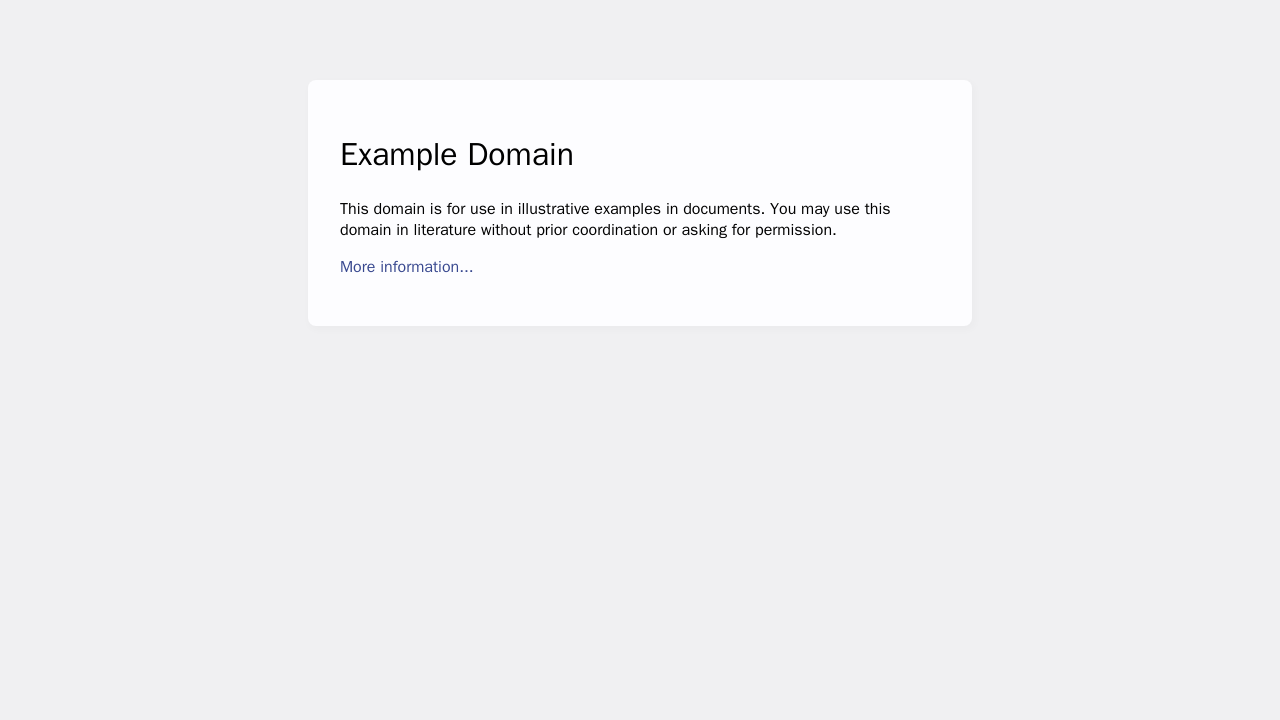

✅ Screenshot displayed successfully


In [4]:
# Display the screenshot in the notebook
from IPython.display import Image, display
import os

screenshot_path = '/app/data/jupyter_test_screenshot.png'

if os.path.exists(screenshot_path):
    try:
        display(Image(screenshot_path))
        print("✅ Screenshot displayed successfully")
    except Exception as e:
        print(f"❌ Could not display screenshot: {e}")
else:
    print(f"❌ Screenshot file does not exist at {screenshot_path}")

## 5. Use Simple Playwright Test (Async Version)

Let's create a simple Playwright test that just navigates to example.com.
Since we're in a Jupyter notebook with an asyncio loop, we need to use the Async API.

In [5]:
# Simple test to verify Playwright is working with async API
from playwright.async_api import async_playwright
import asyncio

# Simple async test that only goes to example.com
async def simple_async_test():
    async with async_playwright() as playwright:
        print("Starting simple browser test...")
        browser = await playwright.chromium.launch(headless=False)
        context = await browser.new_context()
        page = await context.new_page()
        
        # Navigate to example.com
        print("Opening example.com...")
        await page.goto('https://example.com')
        await asyncio.sleep(3)
        
        # Take a screenshot
        print("Taking screenshot...")
        await page.screenshot(path='/app/data/example_simple.png')
        
        # Close browser
        print("Test complete!")
        await browser.close()
        
        return '/app/data/example_simple.png'

# Run the async test
simple_screenshot_path = await simple_async_test()

Starting simple browser test...
Opening example.com...
Taking screenshot...
Test complete!


## 6. View the Simple Test Screenshot

Example.com Screenshot from Simple Test:


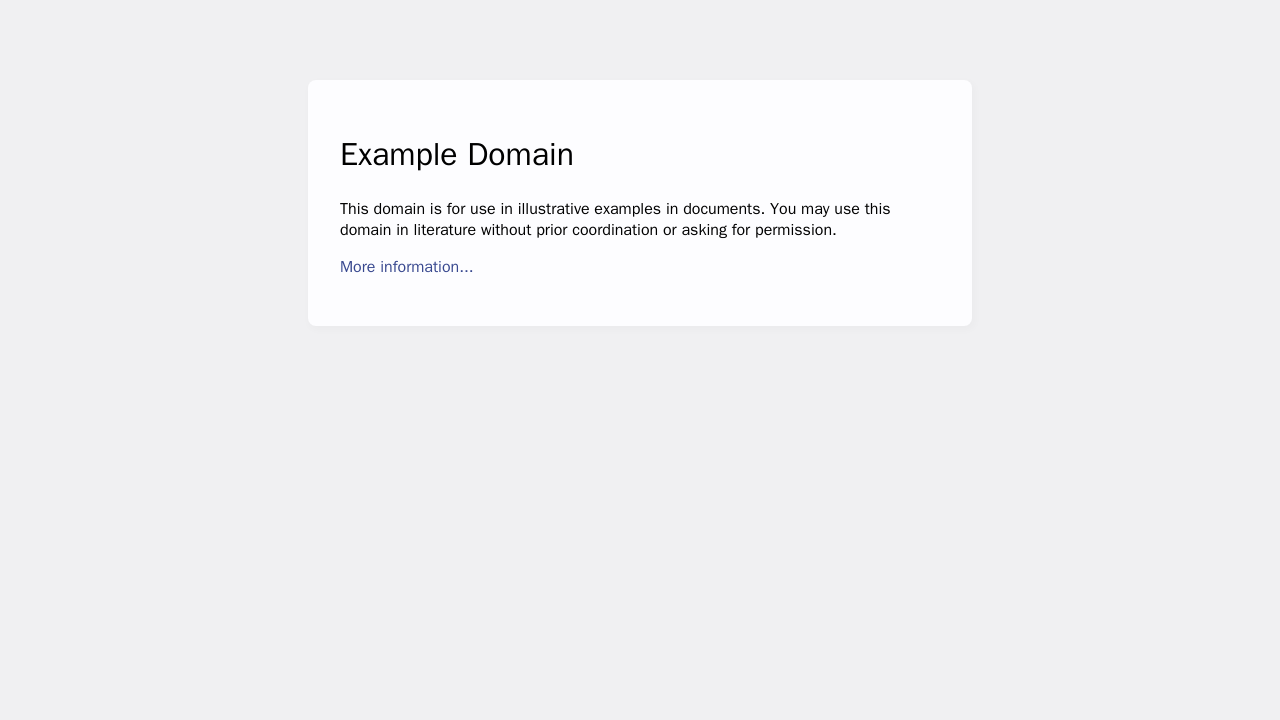

✅ Screenshot displayed successfully


In [6]:
from IPython.display import Image, display
import os

simple_screenshot = '/app/data/example_simple.png'

print("Example.com Screenshot from Simple Test:")
if os.path.exists(simple_screenshot):
    try:
        display(Image(simple_screenshot))
        print("✅ Screenshot displayed successfully")
    except Exception as e:
        print(f"❌ Could not display screenshot: {e}")
else:
    print(f"❌ Screenshot file does not exist at {simple_screenshot}")

## Test Complete

If all cells ran successfully and you were able to see the browser in VNC, your Docker Playwright VNC setup is working correctly!